In [79]:
#将需要的库都加载进来
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 首先让我们概览数据结构，了解下各字段

In [53]:
df_Train = pd.read_csv('/Users/siteng/Documents/GitHub/Kaggle-Titanic/train.csv')
df_Train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


通过前20行的数据概览，我们可以来理解所有字段的含义：
* 1：**PassengerId** 乘客ID
* 2：**Survived** 是否在沉船后活下来
* 3：**Pclass** 乘客舱级
* 4：**Name** 乘客性别
* 5：**Sex** 性别
* 6：**Age** 年龄
* 7：**SibSp** Sib代表sibling，Sp代表spouse，乘客兄弟姐妹及子女的数量
* 8：**Parch** Par代表parent，ch代表children，乘客父母及小孩的数量
* 9：**Ticket** 票号
* 10：**Fare** 票价
* 11：**Cabin** 舱位
* 12：**Embarked** 上船的位置

In [14]:
df_Train.info()#再检查下字段中有没有异常\难处理的数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


从这里我们可以看出船上一共包含891名乘客，而有些数据比如**年龄（Age）**则存在缺失，尤其是具体的**舱位（Cabin）**有很多缺失，联想到电影《泰坦尼克号》中逃票的剧情，这些数据的缺失并不难理解；  
**生还率（Survived）**虽然是int整数类型，但实质上它的取值只有0或1，可以转换为布尔（Boolean）类型；  
**舱位（Pclass）**貌似只有1-3三个舱位，但不确定；  
**性别（Sex）**只有两个值male或female；  
**SibSp**和**Parch**这两个字段的值大多为0，根据现实情况一般来说不会出现过大的数(>10)；**上船（Embarked）**的位置为S\C\Q  
由于只检查了开头的20行数据，我对Pclass, Survived, SibSp, Parch, Embarked这几个字段各值的可能性还没有最终确定，我决定检查一下。

In [32]:
#先用age做个测试：  
df_Age = df_Train.iloc[:,5:6]   
l_Age = df_Age.to_numpy()  
l_unique_Age = np.unique(l_Age)  
print(l_unique_Age)  
#证明此段代码可以用在其他字段中，而且间接提醒了我，到作图的时候，需要将年龄Age中的空缺值填补上！

[ 0.42  0.67  0.75  0.83  0.92  1.    2.    3.    4.    5.    6.    7.
  8.    9.   10.   11.   12.   13.   14.   14.5  15.   16.   17.   18.
 19.   20.   20.5  21.   22.   23.   23.5  24.   24.5  25.   26.   27.
 28.   28.5  29.   30.   30.5  31.   32.   32.5  33.   34.   34.5  35.
 36.   36.5  37.   38.   39.   40.   40.5  41.   42.   43.   44.   45.
 45.5  46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   55.5
 56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   66.   70.
 70.5  71.   74.   80.     nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   n

In [34]:
#我们一个一个来测试
df_Pclass = df_Train.iloc[:,2:3]           #取所有的Pclass数据
l_Pclass = df_Pclass.to_numpy()            #将其从dataframe转换成list
l_unique_Pclass = np.unique(l_Pclass)      #取其中所有唯一值
print(l_unique_Pclass)                     #将结果打印

[1 2 3]


和我的猜想一致，舱级Pclass确实只有1/2/3三种舱级

In [36]:
df_Survived = df_Train.iloc[:,1:2]             #取所有的Survived数据
l_Survived = df_Survived.to_numpy()            #将其从dataframe转换成list
l_unique_Survived = np.unique(l_Survived)      #取其中所有唯一值
print(l_unique_Survived)                       #将结果打印

[0 1]


确实没有异常值，只有0或1，死亡或生还

In [54]:
df_SibSp = df_Train['SibSp']              #取所有的SibSp数据
l_SibSp = df_SibSp.to_numpy()             #将其从dataframe转换成list
l_unique_SibSp = np.unique(l_SibSp)       #取其中所有唯一值
print(l_unique_SibSp)                     #将结果打印

[0 1 2 3 4 5 8]


这个也和我的猜想基本一致，没有自己兄弟姐妹+子女超过10人的家庭

In [55]:
df_Parch = df_Train['Parch']              #取所有的Parch数据
l_Parch = df_Parch.to_numpy()             #将其从dataframe转换成list
l_unique_Parch = np.unique(l_Parch)       #取其中所有唯一值
print(l_unique_Parch)                     #将结果打印

[0 1 2 3 4 5 6]


和上段代码一样，没有自己父母+子女超过10人的家庭

In [47]:
df_Embarked = df_Train['Embarked']              #取所有的Embarked数据
l_Embarked = df_Embarked.to_numpy()             #将其从dataframe转换成list
s_unique_Embarked = set(l_Embarked)             #由于值不是int，我们可以将其转换成集合
l_unique_Embarked = list(s_unique_Embarked)     #再从集合转化成list
print(l_unique_Embarked)                        #将结果打印

['Q', nan, 'S', 'C']


果然，只有S/Q/C三个上船点，并且证实有些缺失的数据

### 详细了解了数据类型后，我们可以开始进行初步的分析

In [50]:
df_Train.describe() #利用describe()看下各字段

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


几个比较重要的数据：
* 存活率：38.38%  
* 平均年龄：29.7岁
* 舱级：在三等舱的比一等和二等多很多
* 兄弟姐妹及子女：平均约2人会带一个
* 父母和小孩：平均2.6人会带一个
* 票价：平均为32美元，最大512美元和二十五分位数的7.9美元相差甚远  
虽然我们可以了解到一些数据，这些数据看起来并不直观，我们接下来利用matplotlib来画图

*别忘记补充一些需要计算的却缺失数据的字段

In [57]:
df_Train['Age'] = df_Train['Age'].fillna(df_Train['Age'].median())   #取中位值补全数据
df_Train.head(6)  #总之前head(20)中看到第6行原来有空缺值，现在再看一下

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q


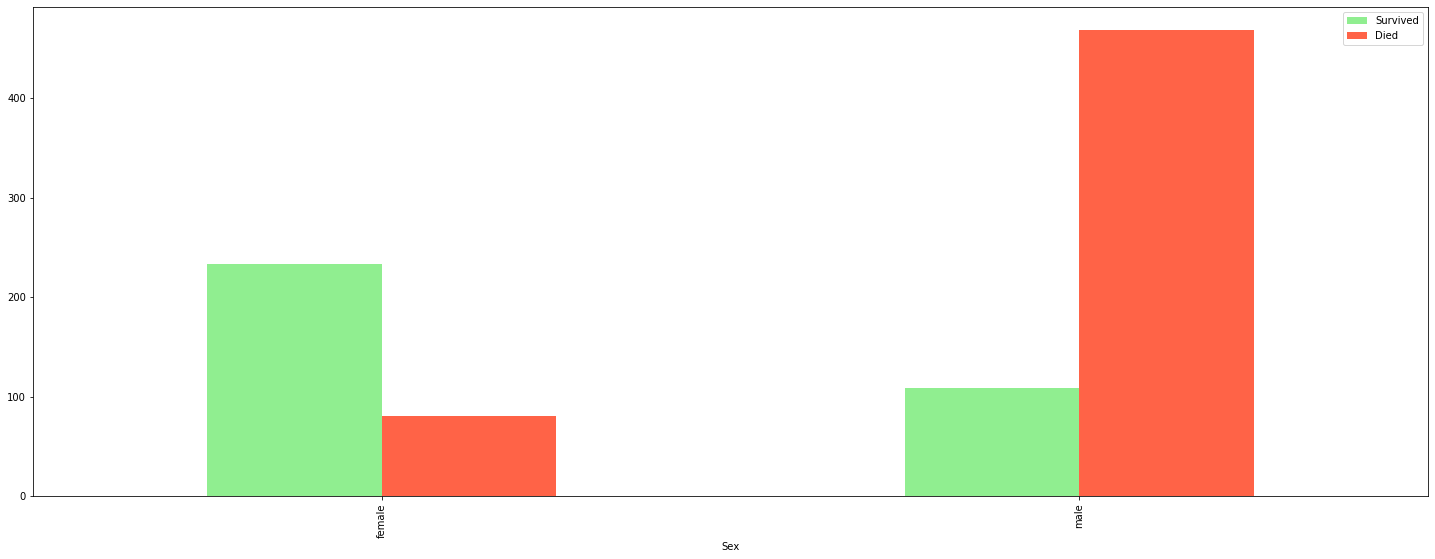

In [80]:
df_Train['Died'] = 1 - df_Train['Survived']
df_Train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 9),
color=['lightgreen', 'tomato'])

从这里我们不难看出：  
* 1. 男性数量远大于女性（甚至男性死亡人数大于女性总人数）
* 2. 男性的死亡率远高于女性死亡率
* 3. 男性的生还率非常低  

我们可以结合当时的情景：在电影泰坦尼克号中，船撞击冰山时，由于救生艇不够用，副船长说先救***女人***和小孩，而现在的数据证明确实女性生存率更高，这之间确实有一定联系。

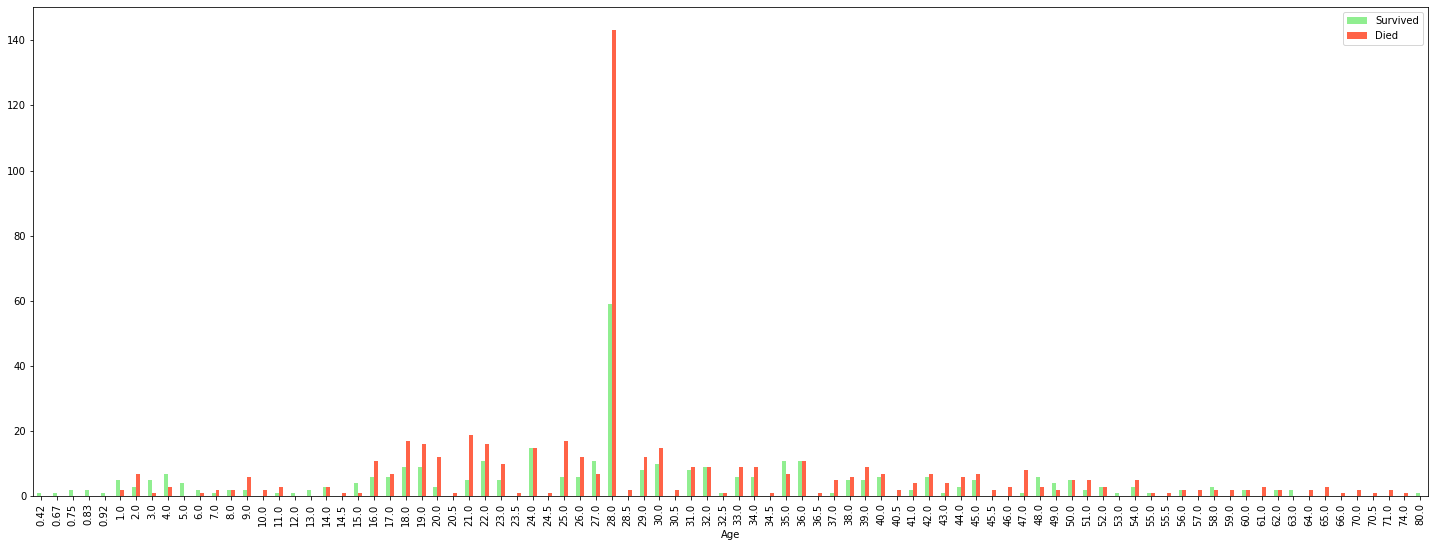

In [84]:
#前面的猜想中除了女人还有小孩，那么我们再来看下年龄对死亡率的影响
df_Train.groupby('Age').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 9),
colors=['lightgreen', 'tomato'])